# 7. 간단한 합성곱 모델

## 실행하기

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 구현 파일 실행시키기

In [2]:
%run 'gdrive/MyDrive/ALZZA/ch07/7. 간단한 합성곱 신경망 클래스.ipynb'
%run 'gdrive/MyDrive/ALZZA/ch05/5. 꽃 이미지 분류 데이터셋 클래스.ipynb'
%run 'gdrive/MyDrive/ALZZA/ch06/6. 오피스31 데이터셋 클래스.ipynb'

### 실험용 데이터셋 객체 생성

In [3]:
fd = FlowersDataset([96, 96], [96, 96, 3])
od = Office31Dataset([96, 96], [96, 96, 3])

### 확장된 모델로 다층 퍼셉트론 신경망 만들어보기

Model flowers_model_1 train started:
    Epoch 2: cost=1.568, accuracy=0.311/0.360 (25/25 secs)
    Epoch 4: cost=1.424, accuracy=0.372/0.380 (25/50 secs)
    Epoch 6: cost=1.357, accuracy=0.419/0.380 (25/75 secs)
    Epoch 8: cost=1.314, accuracy=0.431/0.330 (26/101 secs)
    Epoch 10: cost=1.298, accuracy=0.424/0.410 (26/127 secs)
Model flowers_model_1 train ended in 127 secs:
Model flowers_model_1 test report: accuracy = 0.419, (0 secs)

Model flowers_model_1 Visualization


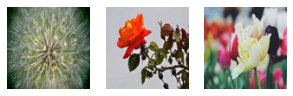

추정확률분포 [32,42, 0, 9, 7, 9] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 9,25, 0,10,37,19] => 추정 sunflower : 정답 rose => X
추정확률분포 [16,15, 0,30, 8,30] => 추정 tulip : 정답 tulip => O


In [4]:
fm1 = CnnBasicModel('flowers_model_1', fd, [30, 10])
fm1.exec_all(epoch_count=10, report=2)

### 완전 연결 계층 구성 정보의 명시적 표현과 아담 알고리즘 해제

Model flowers_model_2 train started:
    Epoch 2: cost=1.459, accuracy=0.350/0.250 (10/10 secs)
    Epoch 4: cost=1.357, accuracy=0.403/0.410 (10/20 secs)
    Epoch 6: cost=1.313, accuracy=0.426/0.430 (10/30 secs)
    Epoch 8: cost=1.277, accuracy=0.439/0.390 (9/39 secs)
    Epoch 10: cost=1.231, accuracy=0.463/0.450 (10/49 secs)
Model flowers_model_2 train ended in 49 secs:
Model flowers_model_2 test report: accuracy = 0.364, (0 secs)

Model flowers_model_2 Visualization


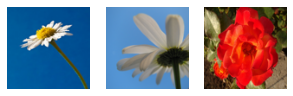

추정확률분포 [29,63, 0, 2, 1, 6] => 추정 dandelion : 정답 daisy => X
추정확률분포 [30,26, 0,13,11,20] => 추정 daisy : 정답 daisy => O
추정확률분포 [ 0, 0, 0,85, 0,15] => 추정 rose : 정답 rose => O


In [5]:
fm2 = CnnBasicModel('flowers_model_2', fd, 
                    [['full', {'width':30}],
                     ['full', {'width':10}]])
fm2.use_adam = False
fm2.exec_all(epoch_count=10, report=2)

### 간단한 합성곱 신경망을 이용한 꽃 이미지 분류 신경망

Model flowers_model_3 train started:
    Epoch 2: cost=1.129, accuracy=0.546/0.540 (207/207 secs)
    Epoch 4: cost=0.899, accuracy=0.664/0.530 (204/411 secs)
    Epoch 6: cost=0.761, accuracy=0.714/0.660 (203/614 secs)
    Epoch 8: cost=0.624, accuracy=0.763/0.560 (202/816 secs)
    Epoch 10: cost=0.489, accuracy=0.821/0.540 (199/1015 secs)
Model flowers_model_3 train ended in 1015 secs:
Model flowers_model_3 test report: accuracy = 0.516, (25 secs)

Model flowers_model_3 Visualization


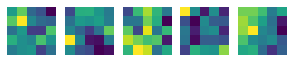

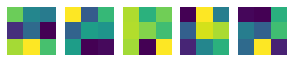

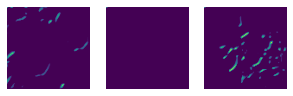

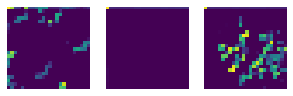

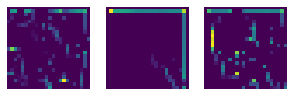

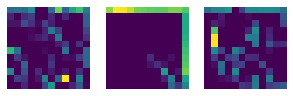

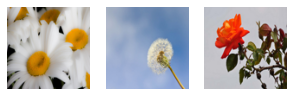

추정확률분포 [ 1, 1, 0,23, 0,75] => 추정 tulip : 정답 daisy => X
추정확률분포 [20,55, 0, 5,13, 7] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [ 0, 0, 0,60, 0,40] => 추정 rose : 정답 rose => O


In [6]:
fm3 = CnnBasicModel('flowers_model_3', fd, 
               [['conv', {'ksize':5, 'chn':6}], 
                ['max', {'stride':4}], 
                ['conv', {'ksize':3, 'chn':12}], 
                ['avg', {'stride':2}]], 
               True)
fm3.exec_all(epoch_count = 10, report = 2)